In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
import matplotlib.pyplot as plt
from keras.initializers import glorot_normal , he_normal

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets

Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h2>1.0 Number of convolusion Layer 2 </2>

#### 1.1 Without droupout or Batch Normilization

In [0]:
model1 = Sequential()
#conv_layer one
model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same',kernel_initializer= he_normal()))
model1.add(MaxPooling2D(pool_size=(2, 2)))   

#conv_layer two
model1.add(Conv2D(64, (3, 3), activation='relu',padding ='same'))

#top layer
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1237 - acc: 0.9617 - val_loss: 0.0469 - val_acc: 0.9860
Epoch 2/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0350 - acc: 0.9893 - val_loss: 0.0358 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0230 - acc: 0.9925 - val_loss: 0.0358 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0149 - acc: 0.9951 - val_loss: 0.0333 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0110 - acc: 0.9964 - val_loss: 0.0417 - val_acc: 0.9874
Epoch 6/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0075 - acc: 0.9975 - val_loss: 0.0386 - val_acc: 0.9884
Epoch 7/12
60000/60000 [====

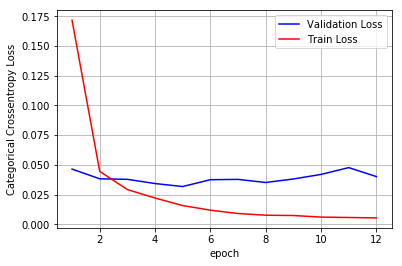

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.2 With Droupout's

In [0]:
model2 = Sequential()
#conv_layer one
model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#conv_layer two
model2.add(Conv2D(64, (3, 3), activation='relu',padding ='same'))
model2.add(Dropout(0.25))

#top layer
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.2666 - acc: 0.9176 - val_loss: 0.0585 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0995 - acc: 0.9705 - val_loss: 0.0408 - val_acc: 0.9851
Epoch 3/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0757 - acc: 0.9765 - val_loss: 0.0371 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0612 - acc: 0.9814 - val_loss: 0.0323 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0511 - acc: 0.9847 - val_loss: 0.0300 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0449 - acc: 0.9853 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 7/12
60

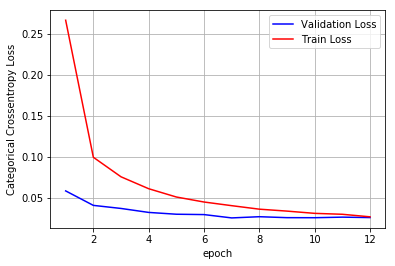

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.3 With only Batch Normilization 

In [0]:
model3 = Sequential()

#conv_layer one
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))


#conv_layer two
model3.add(Conv2D(64, (3, 3), activation='relu',padding ='same'))
model3.add(BatchNormalization())

#top layer
model3.add(Flatten())
model3.add(BatchNormalization())

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())

model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1081 - acc: 0.9680 - val_loss: 0.0882 - val_acc: 0.9706
Epoch 2/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0454 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0182 - acc: 0.9944 - val_loss: 0.0601 - val_acc: 0.9824
Epoch 4/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0534 - val_acc: 0.9857
Epoch 5/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0097 - acc: 0.9972 - val_loss: 0.0522 - val_acc: 0.9848
Epoch 6/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0432 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.0452 -

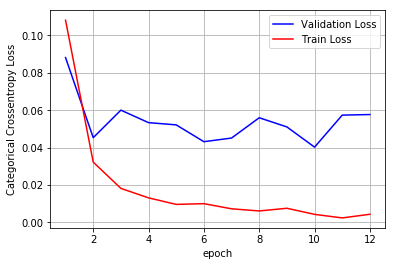

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.4 With Droupout's and Batch Normilization 

In [0]:
model4 = Sequential()

#conv_layer one
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same',kernel_initializer= he_normal(seed=None)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

#conv_layer two
model4.add(Conv2D(64, (3, 3), activation='relu',padding ='same',kernel_initializer= he_normal(seed=None)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#top layer
model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu',kernel_initializer= he_normal(seed=None)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.3016 - acc: 0.9090 - val_loss: 0.0683 - val_acc: 0.9782
Epoch 2/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.1188 - acc: 0.9631 - val_loss: 0.0455 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0883 - acc: 0.9725 - val_loss: 0.0393 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0730 - acc: 0.9768 - val_loss: 0.0327 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0650 - acc: 0.9795 - val_loss: 0.0292 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0595 - acc: 0.9809 - val_loss: 0.0260 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0557 - acc: 0.9823 - val_loss: 0.0314 - 

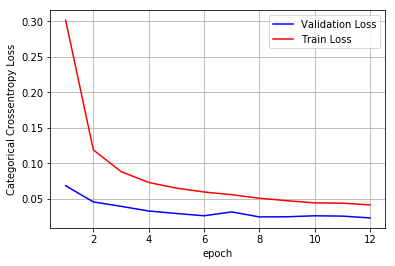

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.5 With Droupout's and Batch Normilization and with different Kernel size

In [0]:
model5 = Sequential()
#conv_layer one
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same',kernel_initializer= he_normal(seed=None)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

#conv_layer two
model5.add(Conv2D(64, (5, 5), activation='relu',padding ='same'))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#top layer
model5.add(Flatten())
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.2609 - acc: 0.9211 - val_loss: 0.0613 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0987 - acc: 0.9705 - val_loss: 0.0366 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0750 - acc: 0.9770 - val_loss: 0.0320 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0621 - acc: 0.9809 - val_loss: 0.0286 - val_acc: 0.9912
Epoch 5/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0555 - acc: 0.9823 - val_loss: 0.0262 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0522 - acc: 0.9835 - val_loss: 0.0252 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0455 - acc: 0.9859 - val_loss: 0.0235 - 

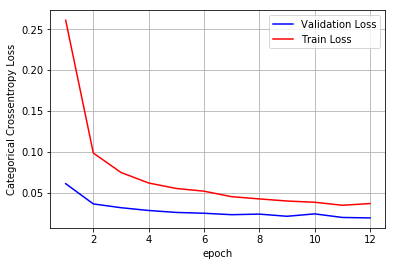

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.6 With Droupout's and Batch Normilization where activation sigmoid and weight initilized

In [0]:
model6 = Sequential()
#conv_layer one
model6.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape,padding ='same',kernel_initializer = glorot_normal()))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

#conv_layer two
model6.add(Conv2D(64, (5, 5), activation='sigmoid',padding ='same',kernel_initializer = glorot_normal()))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#top layer
model6.add(Flatten())
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='sigmoid',kernel_initializer= glorot_normal()))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 220s 4ms/step - loss: 0.9734 - acc: 0.7112 - val_loss: 0.2837 - val_acc: 0.9157
Epoch 2/12
60000/60000 [==============================] - 215s 4ms/step - loss: 0.4309 - acc: 0.8682 - val_loss: 0.2226 - val_acc: 0.9328
Epoch 3/12
60000/60000 [==============================] - 215s 4ms/step - loss: 0.3466 - acc: 0.8935 - val_loss: 0.1855 - val_acc: 0.9405
Epoch 4/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.2905 - acc: 0.9105 - val_loss: 0.1426 - val_acc: 0.9571
Epoch 5/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.2400 - acc: 0.9271 - val_loss: 0.1187 - val_acc: 0.9623
Epoch 6/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2067 - acc: 0.9367 - val_loss: 0.0928 - val_acc: 0.9702
Epoch 7/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1774 - acc: 0.9452 - val_loss: 0.0815 - 

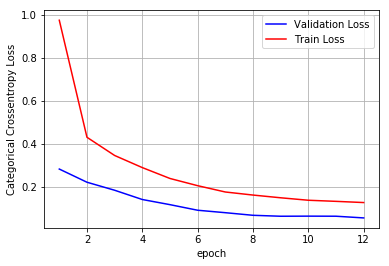

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.7 With Droupout's and Batch Normilization where activation tanh and weight initilized

In [0]:
model7 = Sequential()
#conv_layer one
model7.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=input_shape,padding ='same',kernel_initializer= glorot_normal()))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

#conv_layer two
model7.add(Conv2D(64, (5, 5), activation='tanh',padding ='same',kernel_initializer= glorot_normal()))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

#top layer
model7.add(Flatten())
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='tanh',kernel_initializer= glorot_normal()))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 213s 4ms/step - loss: 0.3632 - acc: 0.8900 - val_loss: 0.1244 - val_acc: 0.9610
Epoch 2/12
60000/60000 [==============================] - 210s 4ms/step - loss: 0.1841 - acc: 0.9429 - val_loss: 0.0914 - val_acc: 0.9714
Epoch 3/12
60000/60000 [==============================] - 210s 4ms/step - loss: 0.1547 - acc: 0.9522 - val_loss: 0.1043 - val_acc: 0.9676
Epoch 4/12
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1464 - acc: 0.9544 - val_loss: 0.0732 - val_acc: 0.9777
Epoch 5/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1379 - acc: 0.9574 - val_loss: 0.0709 - val_acc: 0.9786
Epoch 6/12
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1335 - acc: 0.9585 - val_loss: 0.0840 - val_acc: 0.9727
Epoch 7/12
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1324 - acc: 0.9599 - val_loss: 0.0890 - 

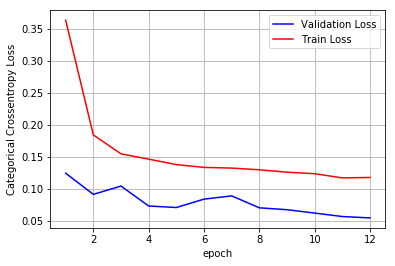

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 1.8 With Droupout's and Batch Normilization where optimizer as sdg

In [0]:
model8 = Sequential()
#conv_layer one
model8.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same',kernel_initializer= he_normal(seed=None)))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

#conv_layer two
model8.add(Conv2D(64, (5, 5), activation='relu',padding ='same',kernel_initializer= he_normal(seed=None)))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#top layer
model8.add(Flatten())
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(128, activation='relu',kernel_initializer= he_normal(seed=None)))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

history = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 210s 3ms/step - loss: 0.6637 - acc: 0.7947 - val_loss: 0.1926 - val_acc: 0.9417
Epoch 2/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.3301 - acc: 0.8977 - val_loss: 0.1417 - val_acc: 0.9569
Epoch 3/12
60000/60000 [==============================] - 207s 3ms/step - loss: 0.2625 - acc: 0.9203 - val_loss: 0.1173 - val_acc: 0.9630
Epoch 4/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2214 - acc: 0.9319 - val_loss: 0.0996 - val_acc: 0.9685
Epoch 5/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1982 - acc: 0.9381 - val_loss: 0.0901 - val_acc: 0.9707
Epoch 6/12
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1772 - acc: 0.9462 - val_loss: 0.0810 - val_acc: 0.9734
Epoch 7/12
60000/60000 [==============================] - 206s 3ms/step - loss: 0.1615 - acc: 0.9505 - val_loss: 0.0728 - 

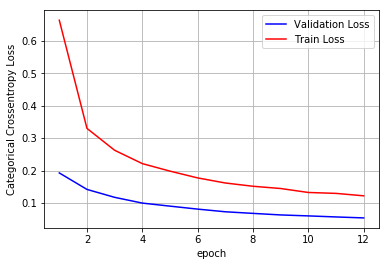

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>2. Number of convolusion Layer 3 </2>

#### 2.1 Without droupout or Batch Normilization

In [0]:
model1 = Sequential()
#conv_layer one
model1.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))   

#conv_layer two
model1.add(Conv2D(64, (5,5), activation='relu',padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#conv_layer three
model1.add(Conv2D(32, (5,5), activation='relu',padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#top layer
model1.add(Flatten())

model1.add(Dense(124, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.2108 - acc: 0.9369 - val_loss: 0.0554 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0530 - acc: 0.9832 - val_loss: 0.0414 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0367 - acc: 0.9884 - val_loss: 0.0277 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0280 - acc: 0.9912 - val_loss: 0.0371 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0389 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0254 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0171 - acc: 0.9944 - val_loss: 0.0288 - 

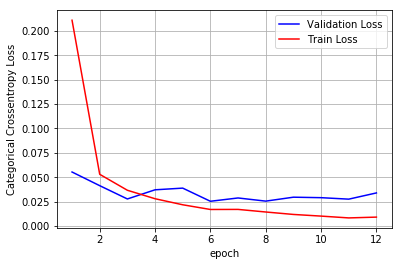

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.2 With Droupout's

In [0]:
model2 = Sequential()

#conv_layer one
model2.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#conv_layer two
model2.add(Conv2D(64, (5, 5), activation='relu',padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#conv_layer three
model2.add(Conv2D(32, (5,5), activation='relu',padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#top layer
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.4295 - acc: 0.8595 - val_loss: 0.0569 - val_acc: 0.9808
Epoch 2/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1168 - acc: 0.9664 - val_loss: 0.0367 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0812 - acc: 0.9758 - val_loss: 0.0302 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0673 - acc: 0.9804 - val_loss: 0.0264 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0564 - acc: 0.9835 - val_loss: 0.0234 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0512 - acc: 0.9848 - val_loss: 0.0241 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0470 - acc: 0.9859 - val_loss: 0.0210 - 

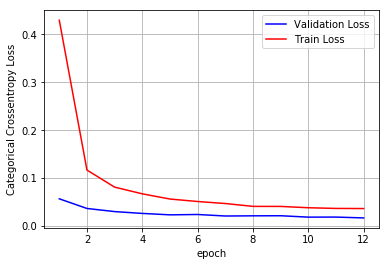

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.3 With only Batch Normilization 

In [0]:
model3 = Sequential()

#conv_layer one
model3.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding ='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

#conv_layer two
model3.add(Conv2D(64, (5,5), activation='relu',padding ='same'))
model3.add(BatchNormalization())

#conv_layer three
model3.add(Conv2D(32, (5,5), activation='relu',padding ='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())

#top layer
model3.add(Flatten())
model3.add(BatchNormalization())

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())

model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 302s 5ms/step - loss: 0.1018 - acc: 0.9698 - val_loss: 0.0451 - val_acc: 0.9855
Epoch 2/12
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0338 - acc: 0.9898 - val_loss: 0.0452 - val_acc: 0.9844
Epoch 3/12
60000/60000 [==============================] - 303s 5ms/step - loss: 0.0229 - acc: 0.9932 - val_loss: 0.0465 - val_acc: 0.9859
Epoch 4/12
60000/60000 [==============================] - 300s 5ms/step - loss: 0.0176 - acc: 0.9946 - val_loss: 0.0348 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0337 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 300s 5ms/step - loss: 0.0136 - acc: 0.9958 - val_loss: 0.0324 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 308s 5ms/step - loss: 0.0089 - acc: 0.9972 - val_loss: 0.0303 - 

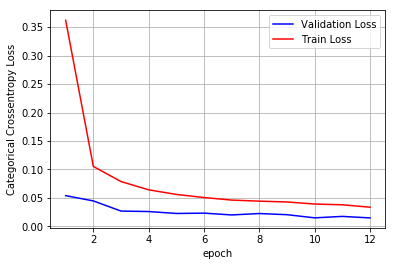

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.4 With Droupout's and Batch Normilization 

In [0]:
model4 = Sequential()

#conv_layer one
model4.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding ='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

#conv_layer two
model4.add(Conv2D(64, (5,5), activation='relu',padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#conv_layer three
model4.add(Conv2D(32, (5,5), activation='relu',padding ='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#top layer
model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 329s 5ms/step - loss: 0.3620 - acc: 0.8880 - val_loss: 0.0541 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 324s 5ms/step - loss: 0.1053 - acc: 0.9679 - val_loss: 0.0448 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0788 - acc: 0.9758 - val_loss: 0.0270 - val_acc: 0.9911
Epoch 4/12
60000/60000 [==============================] - 340s 6ms/step - loss: 0.0643 - acc: 0.9804 - val_loss: 0.0261 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0562 - acc: 0.9830 - val_loss: 0.0227 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 336s 6ms/step - loss: 0.0507 - acc: 0.9841 - val_loss: 0.0233 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0201 - 

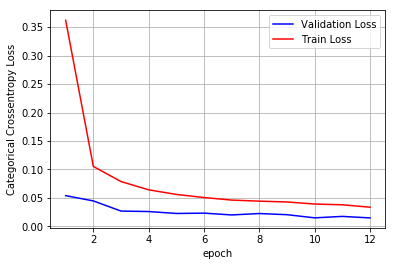

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.5 With Droupout's and Batch Normilization and with different Kernel size

In [0]:
model5 = Sequential()
#conv_layer one
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

#conv_layer two
model5.add(Conv2D(64, (5, 5), activation='relu',padding ='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#conv_layer three
model5.add(Conv2D(32, (2,2), activation='relu',padding ='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#top layer
model5.add(Flatten())
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.7066 - acc: 0.7810 - val_loss: 0.0914 - val_acc: 0.9716
Epoch 2/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.2034 - acc: 0.9381 - val_loss: 0.0509 - val_acc: 0.9830
Epoch 3/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1447 - acc: 0.9556 - val_loss: 0.0402 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1224 - acc: 0.9632 - val_loss: 0.0403 - val_acc: 0.9859
Epoch 5/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1044 - acc: 0.9672 - val_loss: 0.0347 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.0281 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0870 - acc: 0.9739 - val_loss: 0.0278 - 

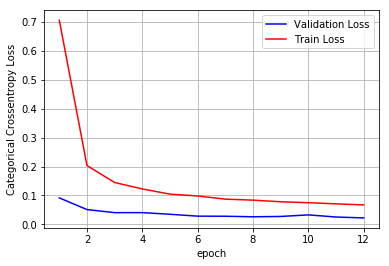

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.6 With Droupout's and Batch Normilization where activation sigmoid and weight initilized

In [0]:
model6 = Sequential()
#conv_layer one
model6.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape,padding ='same',kernel_initializer='glorot_normal'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

#conv_layer two
model6.add(Conv2D(64, (5, 5), activation='sigmoid',padding ='same',kernel_initializer='glorot_normal'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#conv_layer three
model6.add(Conv2D(32, (2,2), activation='sigmoid',padding ='same',kernel_initializer='glorot_normal'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#top layer
model6.add(Flatten())
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='sigmoid',kernel_initializer='glorot_normal'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax',kernel_initializer='glorot_normal'))

model6.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 166s 3ms/step - loss: 1.6869 - acc: 0.4674 - val_loss: 0.4415 - val_acc: 0.8613
Epoch 2/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.5876 - acc: 0.8100 - val_loss: 0.2166 - val_acc: 0.9318
Epoch 3/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.3856 - acc: 0.8790 - val_loss: 0.1578 - val_acc: 0.9500
Epoch 4/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3048 - acc: 0.9042 - val_loss: 0.1078 - val_acc: 0.9644
Epoch 5/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2632 - acc: 0.9190 - val_loss: 0.0991 - val_acc: 0.9677
Epoch 6/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.2314 - acc: 0.9289 - val_loss: 0.0838 - val_acc: 0.9723
Epoch 7/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.2077 - acc: 0.9355 - val_loss: 0.0897 - 

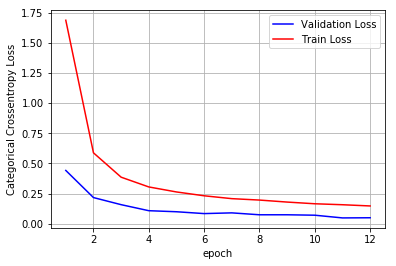

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.7 With Droupout's and Batch Normilization where activation tanh and weight initilized

In [0]:
model7 = Sequential()

#conv_layer one
model7.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=input_shape,padding ='same',kernel_initializer='glorot_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

#conv_layer two
model7.add(Conv2D(64, (5,5), activation='tanh',padding ='same',kernel_initializer='glorot_normal'))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

#conv_layer three
model7.add(Conv2D(32, (2,2), activation='tanh',padding ='same',kernel_initializer='glorot_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))


#top layer
model7.add(Flatten())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='tanh',kernel_initializer='glorot_normal'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='tanh',kernel_initializer='glorot_normal'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.8381 - acc: 0.7397 - val_loss: 0.1820 - val_acc: 0.9484
Epoch 2/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.3099 - acc: 0.9061 - val_loss: 0.0999 - val_acc: 0.9712
Epoch 3/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.2282 - acc: 0.9310 - val_loss: 0.0823 - val_acc: 0.9752
Epoch 4/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1983 - acc: 0.9408 - val_loss: 0.0688 - val_acc: 0.9797
Epoch 5/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1741 - acc: 0.9477 - val_loss: 0.0665 - val_acc: 0.9791
Epoch 6/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1646 - acc: 0.9514 - val_loss: 0.0668 - val_acc: 0.9794
Epoch 7/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.1526 - acc: 0.9550 - val_loss: 0.0816 - 

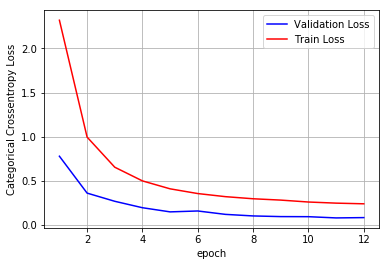

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 2.8 With Droupout's and Batch Normilization where optimizer as sdg

In [0]:
model8 = Sequential()
#conv_layer one
model8.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same',kernel_initializer='he_normal'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

#conv_layer two
model8.add(Conv2D(64, (5, 5), activation='relu',padding ='same',kernel_initializer='he_normal'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#conv_layer three
model8.add(Conv2D(32, (2,2), activation='relu',padding ='same',kernel_initializer='he_normal'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#top layer
model8.add(Flatten())
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(num_classes, activation='softmax',kernel_initializer='he_normal'))

model8.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.6913 - acc: 0.7843 - val_loss: 0.1047 - val_acc: 0.9652
Epoch 2/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.2102 - acc: 0.9348 - val_loss: 0.0569 - val_acc: 0.9811
Epoch 3/12
60000/60000 [==============================] - 150s 3ms/step - loss: 0.1510 - acc: 0.9541 - val_loss: 0.0432 - val_acc: 0.9854
Epoch 4/12
60000/60000 [==============================] - 150s 2ms/step - loss: 0.1237 - acc: 0.9630 - val_loss: 0.0384 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1094 - acc: 0.9671 - val_loss: 0.0320 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0964 - acc: 0.9708 - val_loss: 0.0302 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0886 - acc: 0.9729 - val_loss: 0.0272 - 

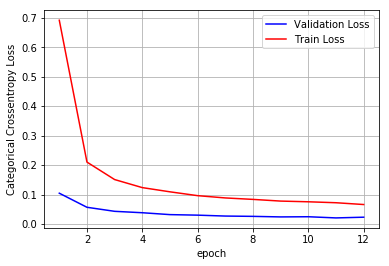

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>3. Number of convolusion Layer 5 </2>

#### 3.1 Without droupout or Batch Normilization

In [0]:
model1 = Sequential()
#conv_layer one
model1.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))   

#conv_layer two
model1.add(Conv2D(64, (5,5), activation='relu',padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#conv_layer three
model1.add(Conv2D(32, (6,6), activation='relu',padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#conv_layer four
model1.add(Conv2D(128, (3,3), activation='relu',padding ='same'))

#conv_layer five
model1.add(Conv2D(16, (5,5), activation='relu',padding ='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#top layer
model1.add(Flatten())

model1.add(Dense(124, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.2825 - acc: 0.9065 - val_loss: 0.0737 - val_acc: 0.9757
Epoch 2/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0643 - acc: 0.9800 - val_loss: 0.0522 - val_acc: 0.9825
Epoch 3/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0451 - acc: 0.9858 - val_loss: 0.0357 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0342 - acc: 0.9890 - val_loss: 0.0352 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0309 - acc: 0.9905 - val_loss: 0.0309 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0241 - acc: 0.9923 - val_loss: 0.0359 - val_acc: 0.9888
Epoch 7/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0220 - acc: 0.9933 - val_loss: 0.0288 - 

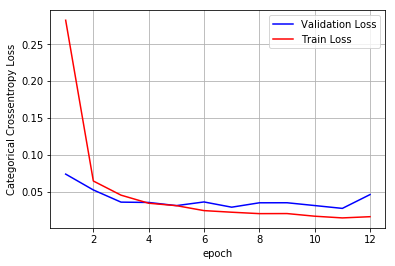

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.2 With Droupout's

In [0]:
model2 = Sequential()

#conv_layer one
model2.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#conv_layer two
model2.add(Conv2D(64, (3, 3), activation='relu',padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#conv_layer three
model2.add(Conv2D(32, (5,5), activation='relu',padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#conv_layer four
model2.add(Conv2D(128, (3,3), activation='relu',padding ='same'))
model2.add(Dropout(0.25))

#conv_layer five
model2.add(Conv2D(16, (8,8), activation='relu',padding ='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#top layer
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 164s 3ms/step - loss: 1.1238 - acc: 0.5675 - val_loss: 0.2079 - val_acc: 0.9573
Epoch 2/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.4904 - acc: 0.8331 - val_loss: 0.0914 - val_acc: 0.9795
Epoch 3/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.3619 - acc: 0.8890 - val_loss: 0.0720 - val_acc: 0.9850
Epoch 4/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2996 - acc: 0.9072 - val_loss: 0.0599 - val_acc: 0.9876
Epoch 5/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2526 - acc: 0.9203 - val_loss: 0.0477 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2302 - acc: 0.9305 - val_loss: 0.0458 - val_acc: 0.9888
Epoch 7/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1864 - acc: 0.9458 - val_loss: 0.0410 - 

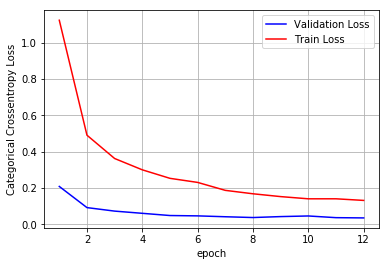

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.3 With Batch Normilization 

In [0]:
model3 = Sequential()

#conv_layer one
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

#conv_layer two
model3.add(Conv2D(128, (3, 3), activation='relu',padding ='same'))
model3.add(BatchNormalization())

#conv_layer three
model3.add(Conv2D(32, (3, 3), activation='relu',padding ='same'))
model3.add(BatchNormalization())


#conv_layer four
model3.add(Conv2D(40, (3, 3), activation='relu',padding ='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())


#conv_layer five
model3.add(Conv2D(8, (3, 3), activation='relu',padding ='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())


#top layer
model3.add(Flatten())


model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())


model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())


model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.1515 - acc: 0.9534 - val_loss: 0.1628 - val_acc: 0.9488
Epoch 2/12
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0452 - acc: 0.9864 - val_loss: 0.0423 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0369 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0250 - acc: 0.9921 - val_loss: 0.0269 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0201 - acc: 0.9936 - val_loss: 0.0378 - val_acc: 0.9870
Epoch 6/12
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 7/12
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0162 - acc: 0.9951 - val_loss: 0.0552 - 

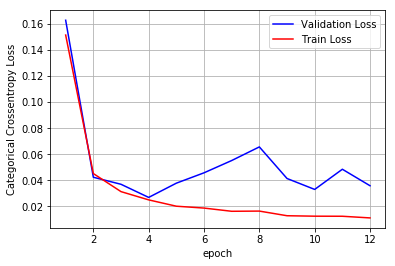

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.4 With Droupout's and Batch Normilization 

In [0]:
model4 = Sequential()

#conv_layer one
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

#conv_layer two
model4.add(Conv2D(128, (3, 3), activation='relu',padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#conv_layer three
model4.add(Conv2D(32, (3, 3), activation='relu',padding ='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#conv_layer four
model4.add(Conv2D(40, (3, 3), activation='relu',padding ='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#conv_layer five
model4.add(Conv2D(8, (3, 3), activation='relu',padding ='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

#top layer
model4.add(Flatten())
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 299s 5ms/step - loss: 1.4600 - acc: 0.5301 - val_loss: 0.2496 - val_acc: 0.9220
Epoch 2/12
60000/60000 [==============================] - 295s 5ms/step - loss: 0.5007 - acc: 0.8400 - val_loss: 0.1035 - val_acc: 0.9680
Epoch 3/12
60000/60000 [==============================] - 291s 5ms/step - loss: 0.3192 - acc: 0.9031 - val_loss: 0.0753 - val_acc: 0.9757
Epoch 4/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.2464 - acc: 0.9269 - val_loss: 0.0532 - val_acc: 0.9825
Epoch 5/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.2024 - acc: 0.9406 - val_loss: 0.0497 - val_acc: 0.9853
Epoch 6/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.1749 - acc: 0.9490 - val_loss: 0.0378 - val_acc: 0.9871
Epoch 7/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.1589 - acc: 0.9530 - val_loss: 0.0371 - 

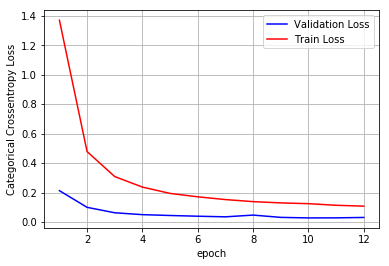

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.5 With Droupout's and Batch Normilization and with different Kernel size

In [0]:
model5 = Sequential()

#conv_layer one
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

#conv_layer two
model5.add(Conv2D(128, (2,2), activation='relu',padding ='same'))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#conv_layer three
model5.add(Conv2D(32, (5,5), activation='relu',padding ='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#conv_layer four
model5.add(Conv2D(40, (2,2), activation='relu',padding ='same'))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#conv_layer five
model5.add(Conv2D(8, (6,6), activation='relu',padding ='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

#top layer
model5.add(Flatten())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 406s 7ms/step - loss: 1.3075 - acc: 0.5807 - val_loss: 0.1747 - val_acc: 0.9488
Epoch 2/12
60000/60000 [==============================] - 405s 7ms/step - loss: 0.4209 - acc: 0.8683 - val_loss: 0.0859 - val_acc: 0.9729
Epoch 3/12
60000/60000 [==============================] - 403s 7ms/step - loss: 0.2584 - acc: 0.9225 - val_loss: 0.0557 - val_acc: 0.9819
Epoch 4/12
60000/60000 [==============================] - 399s 7ms/step - loss: 0.1946 - acc: 0.9433 - val_loss: 0.0490 - val_acc: 0.9845
Epoch 5/12
60000/60000 [==============================] - 404s 7ms/step - loss: 0.1622 - acc: 0.9531 - val_loss: 0.0385 - val_acc: 0.9881
Epoch 6/12
60000/60000 [===================

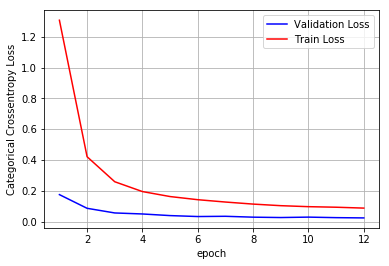

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.6 With Droupout's and Batch Normilization where activation sigmoid and weight initilized

In [0]:
model6 = Sequential()

#conv_layer one
model6.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=input_shape,padding ='same',kernel_initializer='glorot_normal'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

#conv_layer two
model6.add(Conv2D(128, (2,2), activation='sigmoid',padding ='same',kernel_initializer='glorot_normal'))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#conv_layer three
model6.add(Conv2D(32, (5,5), activation='sigmoid',padding ='same',kernel_initializer='glorot_normal'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#conv_layer four
model6.add(Conv2D(40, (2,2), activation='sigmoid',padding ='same',kernel_initializer='glorot_normal'))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#conv_layer five
model6.add(Conv2D(8, (6,6), activation='sigmoid',padding ='same',kernel_initializer='glorot_normal'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

#top layer
model6.add(Flatten())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='sigmoid'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='sigmoid'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 442s 7ms/step - loss: 2.3875 - acc: 0.2048 - val_loss: 1.3163 - val_acc: 0.5565
Epoch 2/12
60000/60000 [==============================] - 434s 7ms/step - loss: 1.0288 - acc: 0.6501 - val_loss: 0.3935 - val_acc: 0.8761
Epoch 3/12
60000/60000 [==============================] - 437s 7ms/step - loss: 0.6866 - acc: 0.7777 - val_loss: 0.2428 - val_acc: 0.9275
Epoch 4/12
60000/60000 [==============================] - 435s 7ms/step - loss: 0.5241 - acc: 0.8352 - val_loss: 0.1962 - val_acc: 0.9396
Epoch 5/12
60000/60000 [==============================] - 440s 7ms/step - loss: 0.4322 - acc: 0.8685 - val_loss: 0.1826 - val_acc: 0.9430
Epoch 6/12
60000/60000 [===================

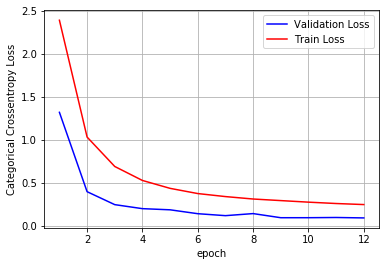

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.7 With Droupout's and Batch Normilization where activation tanh and weight initilized

In [0]:
model7 = Sequential()

#conv_layer one
model7.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=input_shape,padding ='same',kernel_initializer='glorot_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

#conv_layer two
model7.add(Conv2D(128, (2,2), activation='tanh',padding ='same',kernel_initializer='glorot_normal'))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

#conv_layer three
model7.add(Conv2D(32, (5,5), activation='tanh',padding ='same',kernel_initializer='glorot_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

#conv_layer four
model7.add(Conv2D(40, (2,2), activation='tanh',padding ='same',kernel_initializer='glorot_normal'))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

#conv_layer five
model7.add(Conv2D(8, (6,6), activation='tanh',padding ='same',kernel_initializer='glorot_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

#top layer
model7.add(Flatten())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='tanh'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='tanh'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 433s 7ms/step - loss: 1.5087 - acc: 0.5098 - val_loss: 0.2584 - val_acc: 0.9233
Epoch 2/12
60000/60000 [==============================] - 428s 7ms/step - loss: 0.5794 - acc: 0.8145 - val_loss: 0.1464 - val_acc: 0.9564
Epoch 3/12
60000/60000 [==============================] - 430s 7ms/step - loss: 0.4049 - acc: 0.8791 - val_loss: 0.1224 - val_acc: 0.9663
Epoch 4/12
60000/60000 [==============================] - 433s 7ms/step - loss: 0.3470 - acc: 0.8970 - val_loss: 0.2341 - val_acc: 0.9338
Epoch 5/12
60000/60000 [==============================] - 435s 7ms/step - loss: 0.3069 - acc: 0.9110 - val_loss: 0.1331 - val_acc: 0.9608
Epoch 6/12
60000/60000 [==============================] - 435s 7ms/step - loss: 0.2907 - acc: 0.9159 - val_loss: 0.1038 - val_acc: 0.9705
Epoch 7/12
60000/60000 [==============================] - 427s 7ms/step - loss: 0.2649 - acc: 0.9232 - val_loss: 0.1392 - 

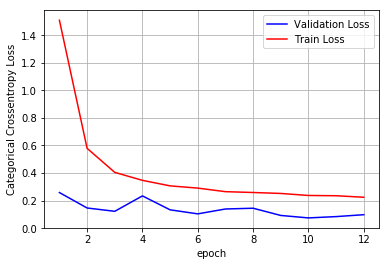

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### 3.8 With Droupout's and Batch Normilization where optimizer as sdg

In [0]:
model8 = Sequential()

#conv_layer one
model8.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding ='same',kernel_initializer='he_normal'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

#conv_layer two
model8.add(Conv2D(128, (2,2), activation='relu',padding ='same',kernel_initializer='he_normal'))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#conv_layer three
model8.add(Conv2D(32, (5,5), activation='relu',padding ='same',kernel_initializer='he_normal'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#conv_layer four
model8.add(Conv2D(40, (2,2), activation='relu',padding ='same',kernel_initializer='he_normal'))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#conv_layer five
model8.add(Conv2D(8, (6,6), activation='relu',padding ='same',kernel_initializer='he_normal'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(BatchNormalization())
model8.add(Dropout(0.25))

#top layer
model8.add(Flatten())
model8.add(Dropout(0.5))

model8.add(Dense(128, activation='relu'))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(128, activation='relu'))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

history = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 444s 7ms/step - loss: 1.9506 - acc: 0.3788 - val_loss: 0.5746 - val_acc: 0.8465
Epoch 2/12
60000/60000 [==============================] - 433s 7ms/step - loss: 0.9691 - acc: 0.6715 - val_loss: 0.3129 - val_acc: 0.9178
Epoch 3/12
60000/60000 [==============================] - 439s 7ms/step - loss: 0.6835 - acc: 0.7739 - val_loss: 0.2045 - val_acc: 0.9398
Epoch 4/12
60000/60000 [==============================] - 455s 8ms/step - loss: 0.5424 - acc: 0.8269 - val_loss: 0.1477 - val_acc: 0.9547
Epoch 5/12
60000/60000 [==============================] - 449s 7ms/step - loss: 0.4624 - acc: 0.8551 - val_loss: 0.1140 - val_acc: 0.9622
Epoch 6/12
60000/60000 [==============================] - 453s 8ms/step - loss: 0.4052 - acc: 0.8743 - val_loss: 0.0925 - val_acc: 0.9698
Epoch 7/12
60000/60000 [==============================] - 454s 8ms/step - loss: 0.3604 - acc: 0.8905 - val_loss: 0.0818 - 

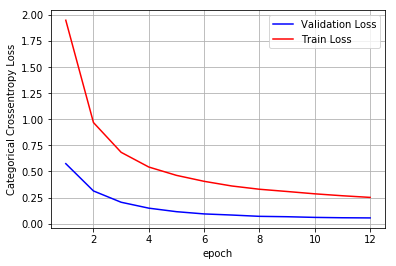

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>Result's</h2>

In [0]:
#for ploting
import matplotlib.pyplot as plt
def plot_gr(X_axis,LP_loss,LP_acc,layers):
    fig = plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    plt.plot(X_axis,LP_loss)
    plt.legend("loss")
    plt.xlabel ("Model")
    plt.ylabel("loss")
    plt.title(str(layers) +"layer CNN")
    plt.subplot(1,2,2)
    plt.plot(X_axis,LP_acc)
    plt.xlabel ("Model")
    plt.ylabel("Accuracy")
    plt.legend("Acc")
    plt.title(str(layers) +"layer CNN")
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [0]:
#BN refers to Batch Normilization layer
#DO refers to Drop Out layer
#Batchsize = 128
#Activation = Relu,sigmoid,tanh
#Optimizer = Adam,sgd

<h2> 2 Layer CNN </h2>

In [31]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model Description","1St layer Filter","2nd layer Filter","Test Loss","Test Acc"]
x.add_row(["without BN & DO" ,"32 (3X3)" ,"64 (3X3)" ,0.0546 ,0.9876])
x.add_row(["Only Do" ,"32 (3X3)" ,"64 (3X3)" ,0.0259 ,0.9926])
x.add_row(["Only BN " ,"32 (3X3)" ,"64 (3X3)" ,0.0577 ,0.9836])
x.add_row(["With BN & DO" ,"32 (3X3)" ,"64 (5X5)" ,0.0229 ,0.9915])
x.add_row(["Diff kernel size" ,"32 (3X3)" ,"64 (5X5)" ,0.0195 ,0.993])
x.add_row(["Activation Sigmoid" ,"32 (3X3)" ,"64 (5X5)" ,0.0572 ,0.9807])
x.add_row(["Activation Tanh" ,"32 (3X3)" ,"64 (5X5)" ,0.0546,0.982])
x.add_row(["Optimizer SGD" ,"32 (3X3)" ,"64 (5X5)" ,0.0538 ,0.9815])

print(x)

+--------------------+------------------+------------------+-----------+----------+
| Model Description  | 1St layer Filter | 2nd layer Filter | Test Loss | Test Acc |
+--------------------+------------------+------------------+-----------+----------+
|  without BN & DO   |     32 (3X3)     |     64 (3X3)     |   0.0546  |  0.9876  |
|      Only Do       |     32 (3X3)     |     64 (3X3)     |   0.0259  |  0.9926  |
|      Only BN       |     32 (3X3)     |     64 (3X3)     |   0.0577  |  0.9836  |
|    With BN & DO    |     32 (3X3)     |     64 (5X5)     |   0.0229  |  0.9915  |
|  Diff kernel size  |     32 (3X3)     |     64 (5X5)     |   0.0195  |  0.993   |
| Activation Sigmoid |     32 (3X3)     |     64 (5X5)     |   0.0572  |  0.9807  |
|  Activation Tanh   |     32 (3X3)     |     64 (5X5)     |   0.0546  |  0.982   |
|   Optimizer SGD    |     32 (3X3)     |     64 (5X5)     |   0.0538  |  0.9815  |
+--------------------+------------------+------------------+-----------+----

In [0]:
X_axis = ["simple","DO","BN","BN & DO","diff size","sigmoid","tanh","SGD"]
two_L_loss = [0.0546 ,0.0259 ,0.0577 ,0.0229 ,0.0195 ,0.0572 ,0.0546 ,0.0538]
two_L_acc = [0.9876,0.9926,0.9836,0.9915,0.993,0.9807,0.982,0.9815 ]

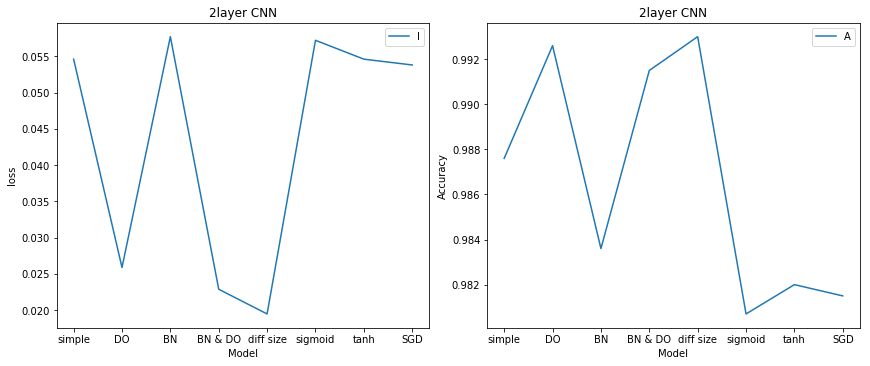

In [33]:
plot_gr(X_axis,two_L_loss,two_L_acc,2)

### Observation:
we can see that the loss got decreased when we use BN and DO with Relu activation and Adam optimizer.when the activation is sigmoid or tanh we can see that the loss increased ,it might be because it would have encountered vanishing gradient .
in case of optimizer as SGD the loss is high because it converges to actual minima is low rate

<h2> 3 Layer CNN <h/2>

In [34]:
x = PrettyTable()
x.field_names = ["Model Description","1St layer Filter","2nd layer Filter","3rd layer Filter","Test Loss","Test Acc"]
x.add_row(["without BN & DO"	,"32 (5X5)" , "64 (5X5)" , "32 (5X5)",	0.0339,	0.9916])
x.add_row(["Only Do"	,"32 (5X5)" , "64 (3X3)" , "32 (5X5)",	0.0169	,0.9941])
x.add_row(["Only BN"	,"32 (5X5)" , "64 (3X3)" , "32 (5X5)",	0.0317,	0.9916])
x.add_row(["With BN & DO"	,"32 (5X5)" , "64 (3X3)" , "32 (5X5)",	0.0149,	0.9946])
x.add_row(["Diff kernel size"	,"32 (3X3)" , "64 (5, 5)" , "32 (2X2)",	0.022,	0.9926])
x.add_row(["Activation Sigmoid"	,"32 (3X3)" , "64 (5, 5)" , "32 (2X2)",	0.0492	,0.9836])
x.add_row(["Activation Tanh"	,"32 (3X3)" , "64 (5, 5)" , "32 (2X2)",	0.0623	,0.9812])
x.add_row(["Optimizer SGD"	,"32 (3X3)" , "64 (5, 5)" , "32 (2X2)",	0.0233	,0.9918])

print(x)

+--------------------+------------------+------------------+------------------+-----------+----------+
| Model Description  | 1St layer Filter | 2nd layer Filter | 3rd layer Filter | Test Loss | Test Acc |
+--------------------+------------------+------------------+------------------+-----------+----------+
|  without BN & DO   |     32 (5X5)     |     64 (5X5)     |     32 (5X5)     |   0.0339  |  0.9916  |
|      Only Do       |     32 (5X5)     |     64 (3X3)     |     32 (5X5)     |   0.0169  |  0.9941  |
|      Only BN       |     32 (5X5)     |     64 (3X3)     |     32 (5X5)     |   0.0317  |  0.9916  |
|    With BN & DO    |     32 (5X5)     |     64 (3X3)     |     32 (5X5)     |   0.0149  |  0.9946  |
|  Diff kernel size  |     32 (3X3)     |    64 (5, 5)     |     32 (2X2)     |   0.022   |  0.9926  |
| Activation Sigmoid |     32 (3X3)     |    64 (5, 5)     |     32 (2X2)     |   0.0492  |  0.9836  |
|  Activation Tanh   |     32 (3X3)     |    64 (5, 5)     |     32 (2X2)

In [0]:
X_axis = ["simple","DO","BN","BN & DO","diff size","sigmoid","tanh","SGD"]
three_L_loss = [0.0339,0.0169,0.0317,0.0149,0.022,0.0492,0.0623,0.0233  ]
three_L_acc = [0.9916,0.9941,0.9916,0.9946,0.9926,0.9836,0.9812,0.9918  ]

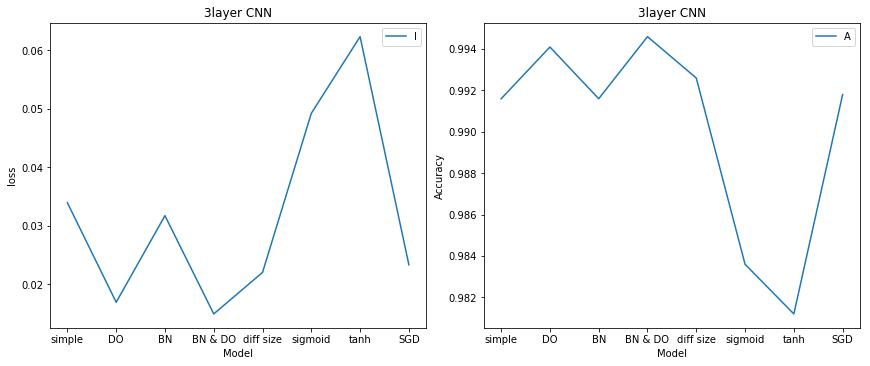

In [36]:
plot_gr(X_axis,three_L_loss,three_L_acc,3)

### Observation:
we can see the same pattern which is there in 2layer CNN,t the loss got decreased when we use BN and DO with Relu activation and Adam optimizer.when the activation is sigmoid or tanh we can see that the loss increased ,it might be because it would have encountered vanishing gradient .
in case of optimizer as SGD the loss is high because it converges to actual minima is low rate

<h2> 5 Layer CNN </h2>

In [37]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model Description","1St layer Filter","2nd layer Filter","3rd layer Filter","4th layer Filter","5th layer Filter","Test Loss","Test Acc"]
x.add_row(["without BN & DO"	,"32 (5X5)" , "64 (5X5)" , "32 (6X6)" , "128 (3X3)" , "16 (5X5)",	0.0459	,0.9892])
x.add_row(["Only Do"	,"32 (5X5)" , "64 (3X3)"	,"32 (5X5)" , "128 (3X3)" , "16 (8X8)",	0.0345	,0.9916])
x.add_row(["Only BN"	,"32 (3X3)" , "128 (3X3)" , "32 (3X3)" , "40 (3X3)",	"8 (3X3)" ,	0.0358,	0.9893])
x.add_row(["With BN & DO"	,"32 (3X3)" , "128 (3X3)" , "32 (3X3)" , "40 (3X3)",	"8 (3X3)"	,0.0307	,0.9901])
x.add_row(["Diff kernel size"	,"32 (3X3)" , "128 (2X2)" , "32 (5X5)" , "40 (2X2)" , "8 (6X6)",	0.0234,	0.9923])
x.add_row(["Activation Sigmoid"	,"32 (3X3)" , "128 (2X2)" , "32 (5X5)" , "40 (2X2)" , "8 (6X6)",	0.0884,	0.9746])
x.add_row(["Activation Tanh"	,"32 (3X3)" , "128 (2X2)" , "32 (5X5)" , "40 (2X2)" , "8 (6X6)",	0.0977	,0.9732])
x.add_row(["Optimizer SGD"	,"32 (3X3)" , "128 (2X2)" , "32 (5X5)" , "40 (2X2)" , "8 (6X6)",	0.0541,	0.9827])
print(x)

+--------------------+------------------+------------------+------------------+------------------+------------------+-----------+----------+
| Model Description  | 1St layer Filter | 2nd layer Filter | 3rd layer Filter | 4th layer Filter | 5th layer Filter | Test Loss | Test Acc |
+--------------------+------------------+------------------+------------------+------------------+------------------+-----------+----------+
|  without BN & DO   |     32 (5X5)     |     64 (5X5)     |     32 (6X6)     |    128 (3X3)     |     16 (5X5)     |   0.0459  |  0.9892  |
|      Only Do       |     32 (5X5)     |     64 (3X3)     |     32 (5X5)     |    128 (3X3)     |     16 (8X8)     |   0.0345  |  0.9916  |
|      Only BN       |     32 (3X3)     |    128 (3X3)     |     32 (3X3)     |     40 (3X3)     |     8 (3X3)      |   0.0358  |  0.9893  |
|    With BN & DO    |     32 (3X3)     |    128 (3X3)     |     32 (3X3)     |     40 (3X3)     |     8 (3X3)      |   0.0307  |  0.9901  |
|  Diff kerne

In [0]:
X_axis = ["simple","DO","BN","BN & DO","diff size","sigmoid","tanh","SGD"]
five_L_loss = [0.0459,0.0345,0.0358,0.0307,0.0234,0.0884,0.0977,0.0541  ]
five_L_acc = [0.9892,0.9916,0.9893,0.9901,0.9923,0.9746,0.9732,0.9827  ]

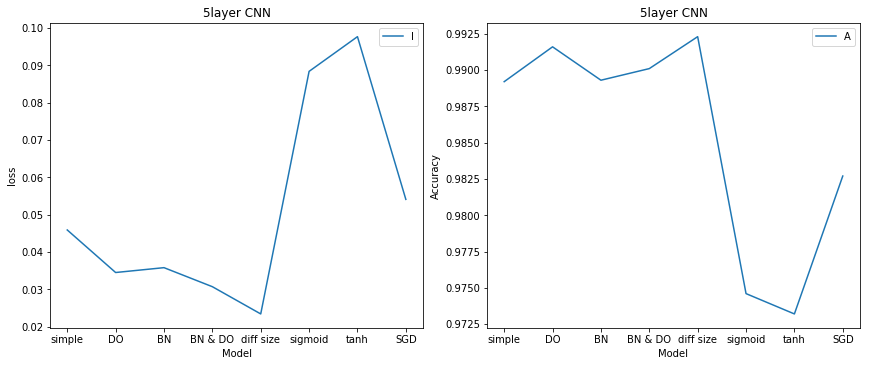

In [39]:
plot_gr(X_axis,five_L_loss,five_L_acc,5)

### Observation:
we can see that the loss got decreased when we use BN and DO with Relu activation and Adam optimizer.when the activation is sigmoid or tanh we can see that the loss increased ,it might be because it would have encountered vanishing gradient .
in case of optimizer as SGD the loss is high because it converges to actual minima is low rate

Text(0.5, 1.0, 'Model vs Accuracy')

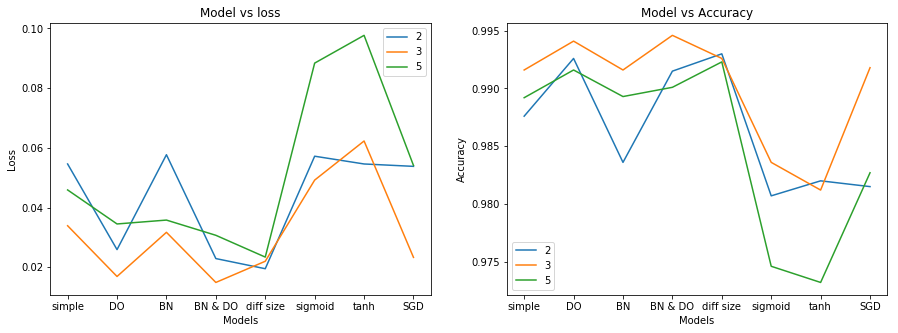

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_axis,two_L_loss,label = 2)
plt.plot(X_axis,three_L_loss,label = 3)
plt.plot(X_axis,five_L_loss,label = 5)
plt.legend()
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Model vs loss")
plt.subplot(1,2,2)
plt.plot(X_axis,two_L_acc,label = 2)
plt.plot(X_axis,three_L_acc,label = 3)
plt.plot(X_axis,five_L_acc,label = 5)
plt.legend()
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model vs Accuracy")

### Observation:
From the above graph we can see that the loss curve of 5 layered CNN is always below loss curve of 3 layered and CNN and 3 layerd CNN curve is below 2layered CNN.so we can witness increase in number of layers results in decrease in loss.same way the accuracy curve of deep layered CNN is always above less deep layered CNN.